Nathan Saric - 03/09/2021

## Instructions

For this assignment, you are asked to use data science tools to solve a business problem. Your evaluation is based on your implementation and understanding of the steps taken in your analysis.

You are expected to implement your model using Python 3 code using default Anacoda package and when prompted, provide your written answers to the questions in the markdown cells.

Submit your completed notebook/python file. No pdfs or word documents. No excel files. Your code will be checked so please make sure that with the code and .csv data (which I have, so you do not need to submit the data) your code will run and produce results. i.e. all data manipulations need to be done in this document not elsewhere. I suggest using the restart kernel then re-run button on the right side of the jupyter tool bar on the final version of your code to make sure your code can indeed run. 

*NOTE: The code cell does not have a set answer, as long as your code can run without error and produce the results you are instructed to produce it is a good answer. The questions is often open-ended as well, you must however justfiy your answer with proof you find in data or in theory.



---

## Business Problem

Your team of analysts is consulting for a financial firm who is launching a new financial product. They ask you to help them predict the income of their customers based on census data. They will use these predictions for a targeted marketing campaign.

Your client also shared that the customer will only accept the offer if their income >50K.

To complete this task, your client gave you a census dataset with customer features and wants you to train at least 2 classification models to predict if the income level of a customer in >50K. 

The steps of your analysis can be broken down as follows:

1. Load Dataset
2. Exploratory Analysis
3. Organizing Data and Train-Test Split
4. Model Training
5. Model Validation & Selection

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

---
## 1. Load Dataset
Load the csv data into pandas dataframe. Display the data set.

In [9]:
# Loading the .csv data into pandas dataframe
census = pd.read_csv('census.csv')

# Displaying the data set
display(census)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 2. Exploratory analysis
Create summary statistics of the data set, such as mean/sd for numerical features, counts for categorical features, refer to Week 3 parametric models examples code I posted, and of course other tutorials available on datacamp/internet. You are free to do more if you'd like, such as visualizations.

In [10]:
# Displaying summary statistics for numerical features 
census.describe(include=['int64'])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


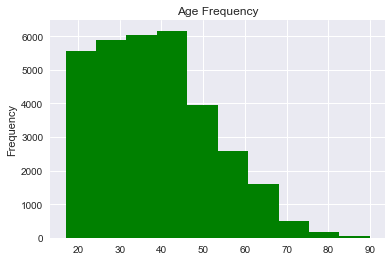

In [11]:
# Visualizing histogram for the age column in the data set
census['age'].plot.hist(title='Age Frequency', color='green')
plt.show()

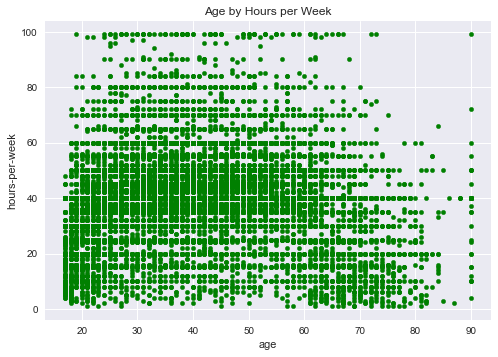

In [12]:
# Visualizing scatter plot between age and hours-per-week columns in the data set
plt.style.use('seaborn')
census.plot.scatter('age', 'hours-per-week', title='Age by Hours per Week', color='green')
plt.show()

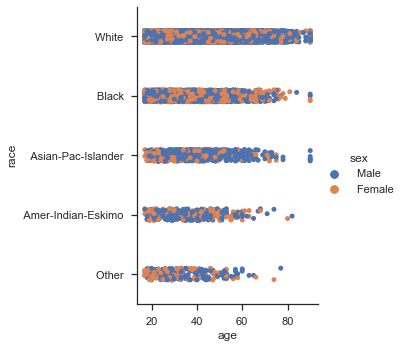

In [13]:
import seaborn

# Visualizing scatter plot between age, race, and sex columns in the data set
seaborn.set_theme(style="ticks", color_codes=True)
seaborn.catplot(x="age", y="race", hue='sex', data=census)
plt.show()

In [14]:
# Displaying the counts for categorical features by looping through each column that is of type 'object' 
for column in census:
    if census[column].dtypes == 'object':
        print('-' * 40)
        print(column.upper())
        print(census[column].value_counts())
        print('-' * 40)

----------------------------------------
WORKCLASS
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
----------------------------------------
EDUCATION
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
----------------------------------------
----------------------------------------
MARITAL-STATUS
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                

---
### Questions
1. You are not expected to clean the data in this assignment. However, given what you see in the exploratory analysis, 
do you find potential features that you believe could benefit from cleaning/recoding?

1. With regards to the numerical features, the 'education-num' column on its own has very little meaning without the 'education' column. This column could be eliminated altogether by turning the 'education' column into dummy variables; representing the same information. Although there are no missing values in any of the numerical columns, in the event of a missing value, the default value should be the mean or median of the relevant column, especially if the value '0' has an actual meaning in the given context. 

    The data contained in columns representing categorical features could be cleaned by handling all '?' values. This unknown observation appears in the columns "workclass", "occupation", and "native-country". This can be resolved by removing them altogether or by creating a new label should the column encounter an unknown observation. 

## 3. Organizing data into analysis ready form and train-test split
Use all numeric features in this data set, plus categorical features "workclass", "race", "sex", "income-class". Refer to previous example codes and other sources to turn categorical features into dummy variables using get_dummies from pandas. If you prefer other ways to code dummy variables, feel free to do it too.   
<br>
One small but important note, after using get_dummies, there may be unexpected spaces added into the newly created dummy feature names. For example, 'income-class_ >50K' might have a space between _ and > that you wouldn't expect or even see when you display the table. The way to be able to see these sutle changes is to use list(df.columns) (replace df with your own dataframe's name obviously) and list all the columns in your data. You can simply then copy and paste the correct names.

In [15]:
# Dropping the columns with categorical features we are not interested in testing
drop_columns = ['education', 'marital-status', 'occupation', 'relationship', 'native-country']
census = census.drop(columns=drop_columns)

# Creating dummy variables for the columns with categorical features in which we are interested in testing 
dummy_columns = ['workclass', 'race', 'sex', 'income-class']
census = pd.get_dummies(data=census, columns=dummy_columns, drop_first=True) 

# Displaying the organized data set
display(census)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income-class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,1,1
32558,58,151910,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [16]:
# Splitting the data into target and features
y_census = census.loc[:, ['income-class_ >50K']]
X_census = census.drop(columns=['income-class_ >50K'])

# Applying the train-test-split function on the relevant data
X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, test_size=0.2, random_state=25)

# Formatting y_test to be a 1-dimensional array
y_test = y_test['income-class_ >50K']

---
### Questions
1. Are there additional feature(s) you could derive from the existing data (you are not asked to actually do this)? If you could ask for additional data on the customers, what data would you ask for? 

1. An additional feature that can be derived from the existing data is the 'net capital gain/loss' calculated by subtracting the 'capital loss' column from the 'capital gain' column. This new feature may be able to provide a deeper insight into a customer's profile. 

    Additional data that can be requested from customers that will serve to better predict their income level include the amount of insurance coverage a customer owns (in dollars), the type of residence, or the number of members in the customer's household. These factors can further be analysed to determine its correlation to income level, therefore, improving the firm's ability to make predictions with a higher level of accuracy and precision. 

## 4. Model Training

You are expected to implement at least *TWO* of the following classification models.
* K Nearest Neighbors
* Linear Discriminant Analysis
* SVM
* Decision Trees
* Logistic Regression
* Naïve Bayes

More information on these models can be found here: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [18]:
# Implementation of K Nearest Neighbors classification model
kNearestNeighbors = KNeighborsClassifier()
kNearestNeighbors.fit(X_train, np.ravel(y_train, order='C'))
y_probability_knn = kNearestNeighbors.predict_proba(X_test)
y_prediction_knn = y_probability_knn[:,1]

# Implementation of Linear Discriminant Analysis classification model
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()
linearDiscriminantAnalysis.fit(X_train, np.ravel(y_train, order='C'))
y_probability_ldr = linearDiscriminantAnalysis.predict_proba(X_test)
y_prediction_ldr = y_probability_ldr[:,1]

# Implementation of Decision Tree classification model
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, np.ravel(y_train, order='C'))
y_probability_dt = decisionTree.predict_proba(X_test)
y_prediction_dt = y_probability_dt[:,1]

# Implementation of Logistic Regression classification model
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, np.ravel(y_train, order='C'))
y_probability_lr = logisticRegression.predict_proba(X_test)
y_prediction_lr = y_probability_lr[:,1]

# Implementation of Naïve Bayes classification model
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, np.ravel(y_train, order='C'))
y_probability_nb = naiveBayes.predict_proba(X_test)
y_prediction_nb = y_probability_nb[:,1]

## 5. Model Validation & Selection

You are expected to validate your models using ROC Curves and Lift Curves.

For convenience, the following functions allow you to plot these.

Read carefuly the docstring (in """ and in red if you are using jupyter), it tells you the type of data these function can take.

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*actual.sum()+fpr*(actual.count()-actual.sum()))/actual.count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

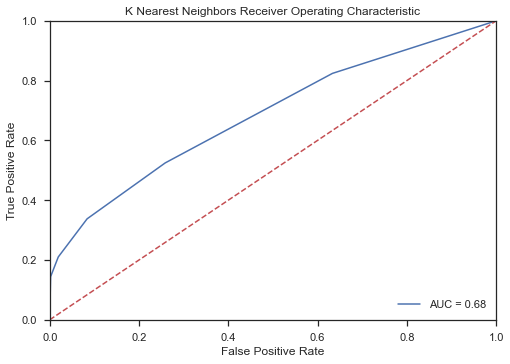

<ipython-input-19-4f5cd023db2f>:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-19-4f5cd023db2f>:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')
<ipython-input-19-4f5cd023db2f>:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')


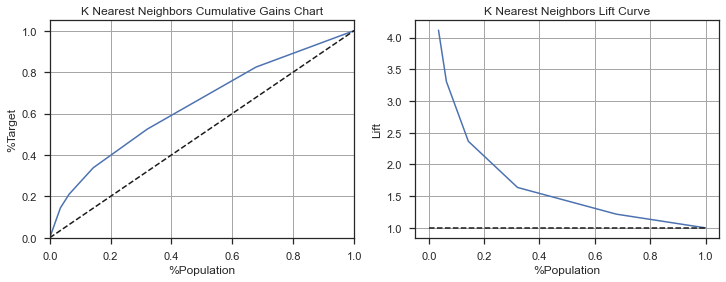

In [20]:
# Plotting the ROC curve and the Lift Curve for the K Nearest Neighbors classification model
roc_plot(y_test, y_prediction_knn, 'K Nearest Neighbors ')
lift_plot(y_test, y_prediction_knn, 'K Nearest Neighbors ')

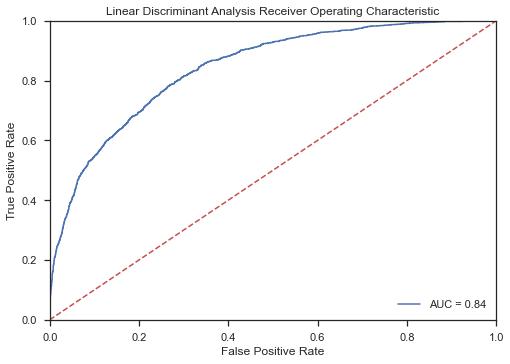

<ipython-input-19-4f5cd023db2f>:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-19-4f5cd023db2f>:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')
<ipython-input-19-4f5cd023db2f>:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')


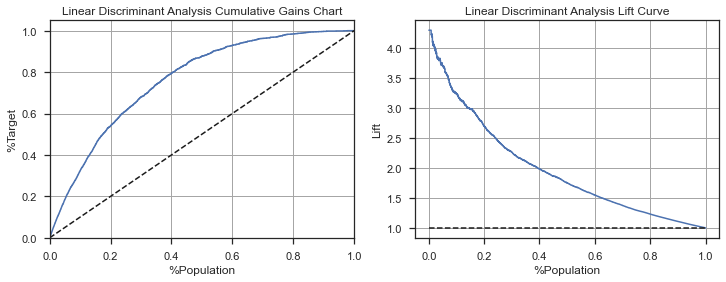

In [21]:
# Plotting the ROC curve and the Lift Curve for the Linear Discriminant Analysis classification model
roc_plot(y_test, y_prediction_ldr, 'Linear Discriminant Analysis ')
lift_plot(y_test, y_prediction_ldr, 'Linear Discriminant Analysis ')

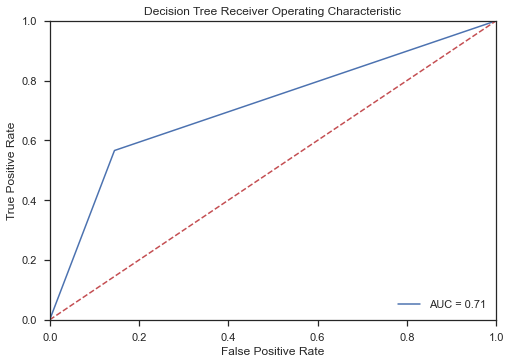

<ipython-input-19-4f5cd023db2f>:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-19-4f5cd023db2f>:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')
<ipython-input-19-4f5cd023db2f>:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')


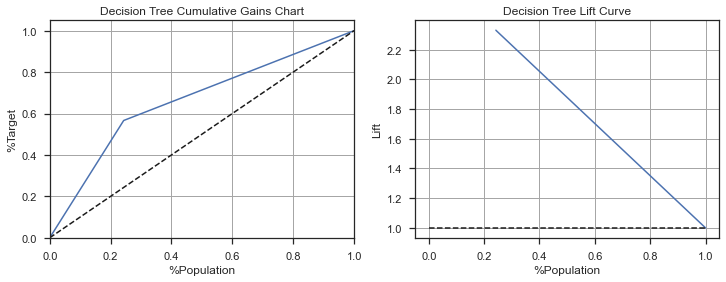

In [22]:
# Plotting the ROC curve and the Lift Curve for the Decicion Tree classification model
roc_plot(y_test, y_prediction_dt, 'Decision Tree ')
lift_plot(y_test, y_prediction_dt, 'Decision Tree ')

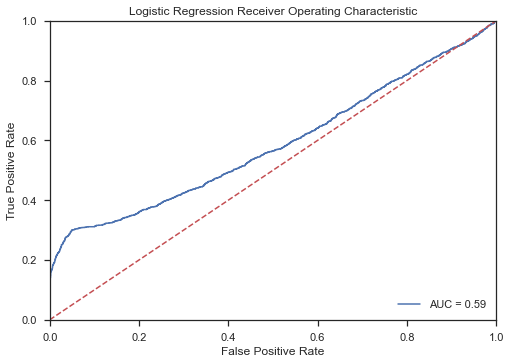

<ipython-input-19-4f5cd023db2f>:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-19-4f5cd023db2f>:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')
<ipython-input-19-4f5cd023db2f>:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')


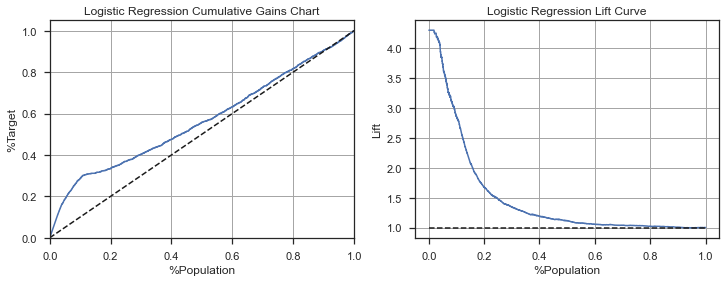

In [23]:
# Plotting the ROC curve and the Lift Curve for the Logistic Regression classification model
roc_plot(y_test, y_prediction_lr, 'Logistic Regression ')
lift_plot(y_test, y_prediction_lr, 'Logistic Regression ')

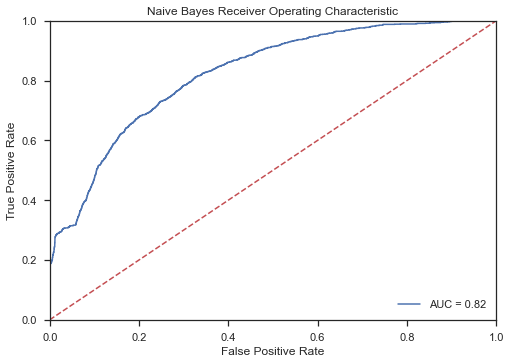

<ipython-input-19-4f5cd023db2f>:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-19-4f5cd023db2f>:48: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ppr, tpr/ppr, label='')
<ipython-input-19-4f5cd023db2f>:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='both', color='0.65',linestyle='-')


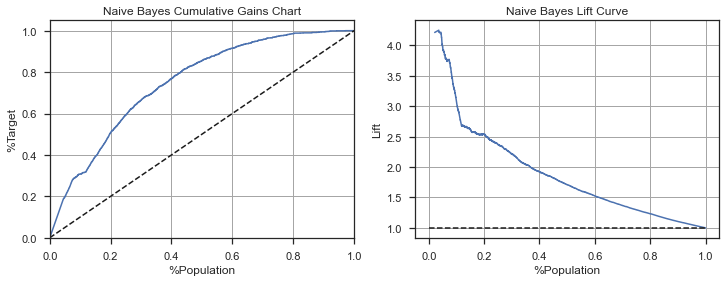

In [24]:
# Plotting the ROC curve and the Lift Curve for the Naive Bayes classification model
roc_plot(y_test, y_prediction_nb, 'Naive Bayes ')
lift_plot(y_test, y_prediction_nb, 'Naive Bayes ')

---
### Questions
1. Recommend a classifier using your intepretation of the ROC and Lift curves.
2. How could you further increase the performance of your classifiers?

1. The ROC Curve that yields the greatest AUC value is the plot for the Linear Discriminant Analysis classification model with an AUC of 0.84. Moreover, the corresponding Lift Curve illustrates that for 10% of the population, using no model will result in only 10% of the target, whereas the Linear Discriminant Analysis classification model should produce over 30% of the target.  

    However, for over 20% of the population, the Naïve Bayes classification model is equally as accurate due to its linear Lift Curve compared to the Linear Discriminant Analysis' Lift Curve. Similarly, the AUC value from the Naïve Bayes' ROC Curve is comparable with a value of 0.82. 

2. There are several ways to improve the performance of the classification models. The most effective way is to increase the amount of data used for training, which will, in turn, decrease the reliance on assumptions and weak correlations. Moreover, as mentioned earlier, treating missing values is important to improving a model's predictive ability. In addition to missing values, identifying and treating outliers will also lead to better models. Lastly, feature engineering is an important step in transforming data and making the data more meaningful. Normalizing datasets and deriving new variables from existing variables can further reveal hidden relationships among the data. 